<a href="https://colab.research.google.com/github/Ahmadfikriand/R-and-Python-Code/blob/master/ANN_Multi_Layer_Perceptron_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import files

#uploaded = files.upload()

#for fn in uploaded.keys():
#  print("User uploaded file {name} with length {length} bytes".format(name=fn, length=len(uploaded[fn])))

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [3]:
import pandas as pd
import io
#df=pd.read_csv(io.StringIO(uploaded['dataset2d3c.csv'].decode('utf-8')))
df=pd.read_csv('dataset2d3c.csv')
df.head()

,x1,x2,class
0,5.0,0.7,versicolor
1,5.1,0.4,virginica
2,5.1,0.0,virginica
3,5.4,0.1,virginica
4,1.5,0.2,setosa


In [4]:
df['class'].unique()

array(['versicolor', 'virginica', 'setosa'], dtype=object)

In [5]:
# Some information about dataset
print (df.shape)
print(type(df)) # 'pandas.core.frame.DataFrame'
print(df.dtypes)

(100, 3)
<class 'pandas.core.frame.DataFrame'>
x1       float64
x2       float64
class     object
dtype: object


In [6]:
df.describe()

,x1,x2
count,100.000000,100.000000
mean,3.804000,0.346000
std,1.767777,0.233731
min,1.000000,0.000000
25%,1.600000,0.200000
50%,4.500000,0.300000
75%,5.100000,0.500000
max,6.700000,0.900000


**a. Gunakan Pandas untuk membaca data, kemudian simpan atribut ciri pada X dan class pada y.**

In [7]:
# Prepare input and output data
# for training models
y = df.pop('class')

X=df

print(X.head())

    x1   x2
0  5.0  0.7
1  5.1  0.4
2  5.1  0.0
3  5.4  0.1
4  1.5  0.2


In [8]:
print(y.head())

0    versicolor
1     virginica
2     virginica
3     virginica
4        setosa
Name: class, dtype: object


**b. Bagilah data 70% untuk training (X_train dan y_train) dan 30% untuk test (X_test, dan y_test), kemudian lakukan normalisasi data.**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.3)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

**c. Gunakan tensorflow untuk membangun model multi-layer perceptron dengan struktur seperti pada gambar.**

In [10]:
# ('identity', 'logistic', 'tanh', 'relu')
net = MLPClassifier(hidden_layer_sizes=(64,32),activation="relu",
                    random_state=1,alpha=1) # (256,128,64,32)
net

MLPClassifier(alpha=1, hidden_layer_sizes=(64, 32), random_state=1)

In [11]:
net.fit(X_trainscaled, y_train)
net

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1, hidden_layer_sizes=(64, 32), random_state=1)

In [12]:
[coef.shape for coef in net.coefs_]

[(2, 64), (64, 32), (32, 3)]

In [13]:
print(net.out_activation_)

softmax


In [14]:
y_pred=net.predict(X_testscaled)
print(net.score(X_testscaled, y_test))

print('Test Accuracy : %.3f'%net.score(X_testscaled, y_test))
print('Training Accuracy : %.3f'%net.score(X_trainscaled, y_train))

1.0
Test Accuracy : 1.000
Training Accuracy : 0.957


**e. Gunakan data testing untuk mendapatkan confusion matrix. Kemudian hitung berapa % akurasi model anda. Coba gunakan model anda untuk memprediksi jenis bunga apa jika x1 = 5.9 dan x2 = 2.2. Prediksi menghasilkan virginica**

In [15]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [16]:
print(net.predict([[5.9,2.2]]))

['virginica']


In [17]:
print(y_pred[:4])
print(y_test[:4].values)

['versicolor' 'versicolor' 'setosa' 'virginica']
['versicolor' 'versicolor' 'setosa' 'virginica']


In [18]:
print('Activation function for hidden layers : {}'.format(net.activation))
print('Solver : {}'.format(net.solver))
print('Alpha value : {}'.format(net.alpha))
# activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
# solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
print('Output activation by default: {}'.format(net.out_activation_))

Activation function for hidden layers : relu
Solver : adam
Alpha value : 1
Output activation by default: softmax


In [19]:
print('Test Accuracy : %.3f'%net.score(X_testscaled, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training Accuracy : %.3f'%net.score(X_trainscaled, y_train))

Test Accuracy : 1.000
Training Accuracy : 0.957


In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as pyplot

In [21]:
y

0     versicolor
1      virginica
2      virginica
3      virginica
4         setosa
         ...    
95     virginica
96        setosa
97     virginica
98        setosa
99    versicolor
Name: class, Length: 100, dtype: object

In [22]:
#Keras requires your output feature to be one-hot encoded values.
import numpy as np
from tensorflow.keras.utils import to_categorical
### Categorical data to be converted to numeric data
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y_number= label_encoder.fit_transform(y)

In [23]:
y_number

array([1, 2, 2, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 2, 2,
       1, 0, 0, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 0, 1, 2,
       0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 1, 2, 1, 2, 0, 1,
       0, 2, 1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 0, 1])

In [24]:
Y = to_categorical(y_number)
print(Y[0:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [25]:
Y

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1

**d. Latihlah model dengan data training yang telah disiapkan, cukup 100 epoch saja. Buatlah grafik Training Loss dan Training Accuracy pada tiap epoch.**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=1, test_size=0.2)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [27]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras import regularizers


model = Sequential()
model.add(Dense(10, input_dim=(2), activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_trainscaled, y_train, validation_data=(X_testscaled,y_test),
                    epochs=100, batch_size=7)

Epoch 1/100
12/12 [==============================] - 3s 53ms/step - loss: 1.1187 - accuracy: 0.0000e+00 - val_loss: 1.0935 - val_accuracy: 0.0000e+00
Epoch 2/100
12/12 [==============================] - 0s 15ms/step - loss: 1.1010 - accuracy: 0.0000e+00 - val_loss: 1.0819 - val_accuracy: 0.0500
Epoch 3/100
12/12 [==============================] - 0s 14ms/step - loss: 1.0871 - accuracy: 0.0125 - val_loss: 1.0712 - val_accuracy: 0.1500
Epoch 4/100
12/12 [==============================] - 0s 13ms/step - loss: 1.0755 - accuracy: 0.1375 - val_loss: 1.0605 - val_accuracy: 0.1500
Epoch 5/100
12/12 [==============================] - 0s 13ms/step - loss: 1.0642 - accuracy: 0.2250 - val_loss: 1.0486 - val_accuracy: 0.2500
Epoch 6/100
12/12 [==============================] - 0s 17ms/step - loss: 1.0511 - accuracy: 0.3375 - val_loss: 1.0352 - val_accuracy: 0.6500
Epoch 7/100
12/12 [==============================] - 0s 20ms/step - loss: 1.0363 - accuracy: 0.6000 - val_loss: 1.0191 - val_accuracy: 0

In [28]:
model.evaluate(X_testscaled,y_test)

1/1 [==============================] - 0s 113ms/step - loss: 0.2291 - accuracy: 1.0000


[0.22908969223499298, 1.0]

In [29]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras import regularizers


model = Sequential()
model.add(Dense(10, input_dim=(2), activation='relu',
                    kernel_initializer='he_normal',
                    kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(7, activation='relu',
                    kernel_initializer='he_normal',
                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(5, activation='relu', kernel_initializer='he_normal',
                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_trainscaled, y_train, validation_data=(X_testscaled,y_test),
                    epochs=100, batch_size=7)

Epoch 1/100
12/12 [==============================] - 5s 48ms/step - loss: 1.3892 - accuracy: 0.2875 - val_loss: 1.3919 - val_accuracy: 0.2500
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 1.3386 - accuracy: 0.3125 - val_loss: 1.3453 - val_accuracy: 0.2500
Epoch 3/100
12/12 [==============================] - 0s 12ms/step - loss: 1.3044 - accuracy: 0.3375 - val_loss: 1.3196 - val_accuracy: 0.2500
Epoch 4/100
12/12 [==============================] - 0s 24ms/step - loss: 1.2859 - accuracy: 0.3500 - val_loss: 1.3137 - val_accuracy: 0.2500
Epoch 5/100
12/12 [==============================] - 0s 23ms/step - loss: 1.2766 - accuracy: 0.3750 - val_loss: 1.3086 - val_accuracy: 0.2500
Epoch 6/100
12/12 [==============================] - 0s 15ms/step - loss: 1.2680 - accuracy: 0.3875 - val_loss: 1.3039 - val_accuracy: 0.2500
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 1.2588 - accuracy: 0.4000 - val_loss: 1.2983 - val_accuracy: 0.2500
Epoch 8

**f. Apakah model tersebut memiliki akurasi yang tinggi? Parameter apa saja yang perlu disesuaikan agar akurasi model meningkat? Berikan analisa anda. Ya sudah, akurasi sudah mendekati angka 1.**

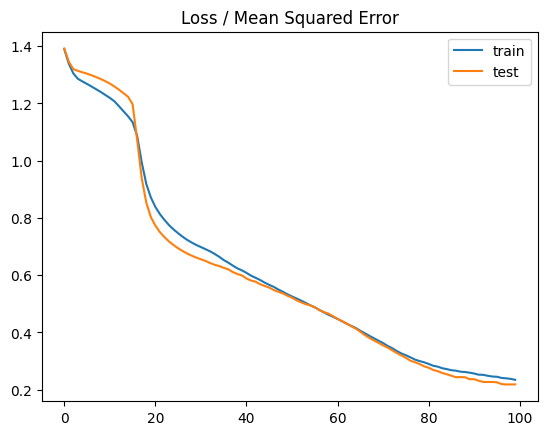

1/1 [==============================] - 0s 154ms/step
[[8 0 0]
 [0 7 0]
 [0 0 5]]
1/1 [==============================] - 0s 61ms/step - loss: 0.2188 - accuracy: 1.0000
Output activation by default: softmax


In [30]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Your input to confusion_matrix must be an array of int not one hot encodings.
y_pred = model.predict(X_testscaled)
cf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cf_matrix)

model.evaluate(X_testscaled,y_test)

print('Output activation by default: {}'.format(net.out_activation_))

In [31]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import confusion_matrix

df=pd.read_csv('dataset2d3c.csv')
df.head()

,x1,x2,class
0,5.0,0.7,versicolor
1,5.1,0.4,virginica
2,5.1,0.0,virginica
3,5.4,0.1,virginica
4,1.5,0.2,setosa


In [32]:
categorical = df.dtypes[df.dtypes == "object"].index
print(categorical)

df[categorical].describe()

Index(['class'], dtype='object')


,class
count,100
unique,3
top,versicolor
freq,34
